# SAR Constant False Alarm Rate (CFAR) object detector in Julia 

## Object detection
 <a class="anchor" id="Introduction"></a>

This notebook illustrates how objects can be detected in Sentinel-1 SLC images using a CFAR approch. Two variants of the CFAR are implemented, the CP-CFAR and the CA-CFAR. 


Object detection are used in many fiels of earth observation in both the land and maritime enviroment. For the maritime enviroment, it is used in great extent for, e.g., iceberg detection or ship detection. 

Often, object detection is used as a priliminary result whereafter the detected objects are classifies as belonging to different classes.

## Table Of Contents
-  [Include modules](#Include)
-  [Load and show Image](#show_image)
-  [CFAR](#CFAR)
-  [CA-CFAR](#ca_cfar)
-  [CP-CFAR](#cp_cfar)
-  [Showing Objects in image](#show_objects)


## Include modules
 <a class="anchor" id="Include"></a>

The package is not relased yet. The code has to be cloned from github and instasiated to use before use. ThE package also contains 2 modules which are not included in the main script since they will be seperated to their own packages before release. 

In [1]:
include("../src/object_detector.jl")
include("../src/object_detector/operations.jl")
include("../src/separateLater/Sentinel1/Sentinel1.jl");
include("../src/separateLater/VisualiseSAR/VisualiseSAR.jl");

using SARProcessing;
using .object_detector;
import .operations

## Load and Show image
 <a class="anchor" id="show_image"></a>

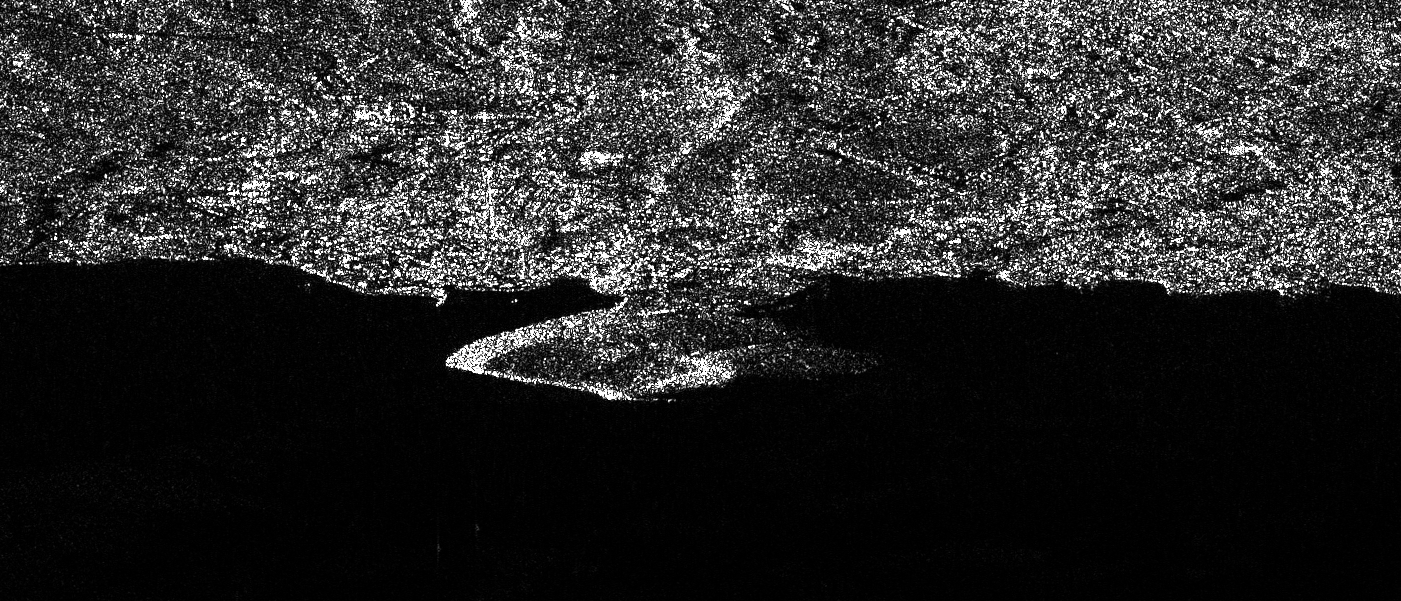

In [4]:
slcSubsetPath = "../test/testData/s1a-iw3-slc-vv_subset_hight9800_10400_width11000_11000.tiff";
complex_image = Sentinel1.readTiff(slcSubsetPath);
image = abs2.(complex_image);
VisualiseSAR.sar2grayimage(image, p_quantile = 0.95)

## CFAR
 <a class="anchor" id="CFAR"></a>

insert Image.

In [5]:
background_window = 31
guard_window = 21
probability_for_alarms = 0.000000000001

1.0e-12

### CA-CFAR
 <a class="anchor" id="ca_cfar"></a>

In [6]:
image_ca_cfar = object_detector.cfar.ca_cfar(image,background_window,guard_window,probability_for_alarms);

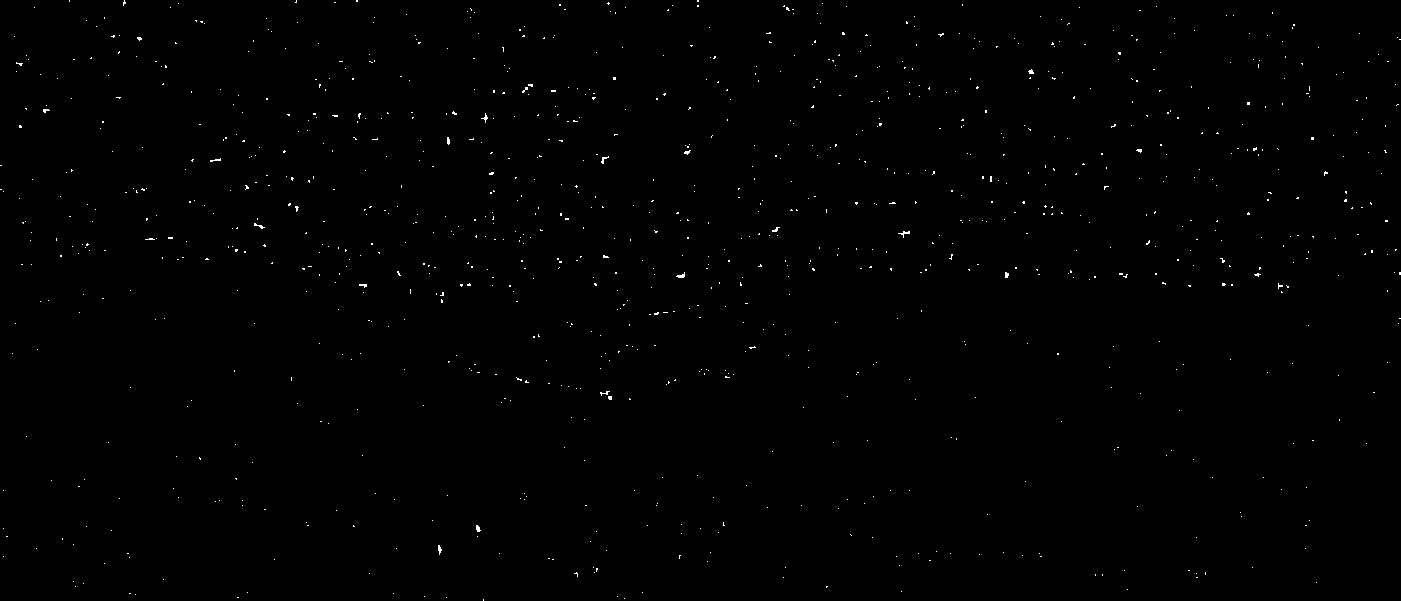

In [7]:
VisualiseSAR.sar2grayimage(image_ca_cfar, p_quantile = 0.95)

In [8]:
image_ca_cfar = operations.binarize_array(image_ca_cfar);

### CP-CFAR
<a class="anchor" id="cp_cfar"></a>

In [9]:
image_cp_cfar = object_detector.cfar.cp_cfar(image,background_window,guard_window,probability_for_alarms);


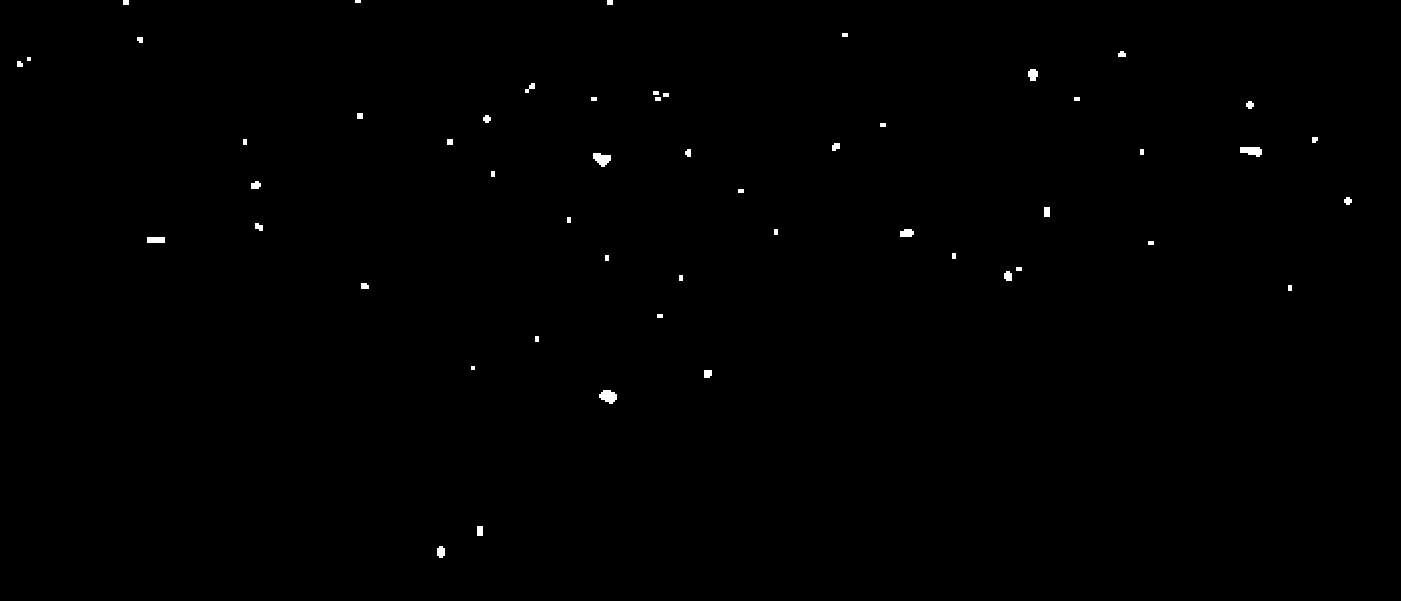

In [10]:
VisualiseSAR.sar2grayimage(image_cp_cfar, p_quantile = 0.95)

## plotting objects in image
<a class="anchor" id="show_objects"></a>

In [11]:
using Plots

In [12]:
heatmap(VisualiseSAR.sar2grayimage(image, p_quantile = 0.95),legend = :none)
heatmap!(operations.mask_array(image_ca_cfar),color=:yellow,legend = :none)
heatmap!(operations.mask_array(image_cp_cfar),color=:red,legend = :none)

UndefVarError: UndefVarError: mask_array not defined

### Subset of object locations

In [27]:
image_cp_cfar = operations.binarize_array(image_cp_cfar);
image_ca_cfar = operations.binarize_array(image_ca_cfar);

In [28]:
coord_cp = operations.object_locations(image_cp_cfar);
coord_ca = operations.object_locations(image_ca_cfar);

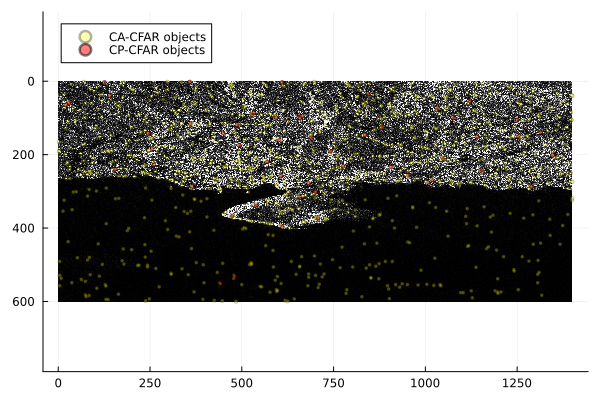

In [29]:
heatmap(VisualiseSAR.sar2grayimage(image, p_quantile = 0.95))
plot!(convert.(Float64,last.(coord_ca)),convert.(Float64,first.(coord_ca)), seriestype=:scatter, label="CA-CFAR objects", mc=:yellow, ms=2, ma=0.3)
plot!(convert.(Float64,last.(coord_cp)),convert.(Float64,first.(coord_cp)), seriestype=:scatter, label="CP-CFAR objects", mc=:red, ms=2, ma=0.5)


### getting subset of object

In [44]:
index = findall(first.(coord_cp) .== maximum(first.(coord_cp)) );

In [54]:
subset = operations.get_subset(image,coordiante = coord_cp[index][1],subset_size = [75,75])

MethodError: MethodError: no method matching get_subset(::Matrix{Float64}; coordiante=[552, 442], subset_size=[75, 75])
Closest candidates are:
  get_subset(::Any, !Matched::Vector{Int64}) at ~/Documents/coding/SARProcessing.jl/src/object_detector/operations.jl:114 got unsupported keyword arguments "coordiante", "subset_size"
  get_subset(::Any, !Matched::Vector{Int64}, !Matched::Vector{Int64}) at ~/Documents/coding/SARProcessing.jl/src/object_detector/operations.jl:114 got unsupported keyword arguments "coordiante", "subset_size"

In [55]:
typeof([75,75])

Vector{Int64} (alias for Array{Int64, 1})

In [52]:
coord_cp[index][1]

2-element Vector{Int64}:
 552
 442